# Information About DataSet

I am using calories burn dataset in this dataset we have to predict how many calories we burn durning exercise

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
#loading the data
cl=pd.read_csv("calories.csv")
cl.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [3]:
ex=pd.read_csv("exercise 1.csv")
ex.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

# Combining the two Dataframes



In [4]:
df=pd.concat([ex,cl["Calories"]],axis=1)

In [5]:
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [6]:
# getting some informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


There are 15000 rows and 9 columns in dataset.There are 1 object datatype and 2 int dataype and rest all are float

In [7]:
# checking for missing values
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

There is no missing Value in data set

In [8]:
# get some statistical measures about the data
df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

# Data Visualization

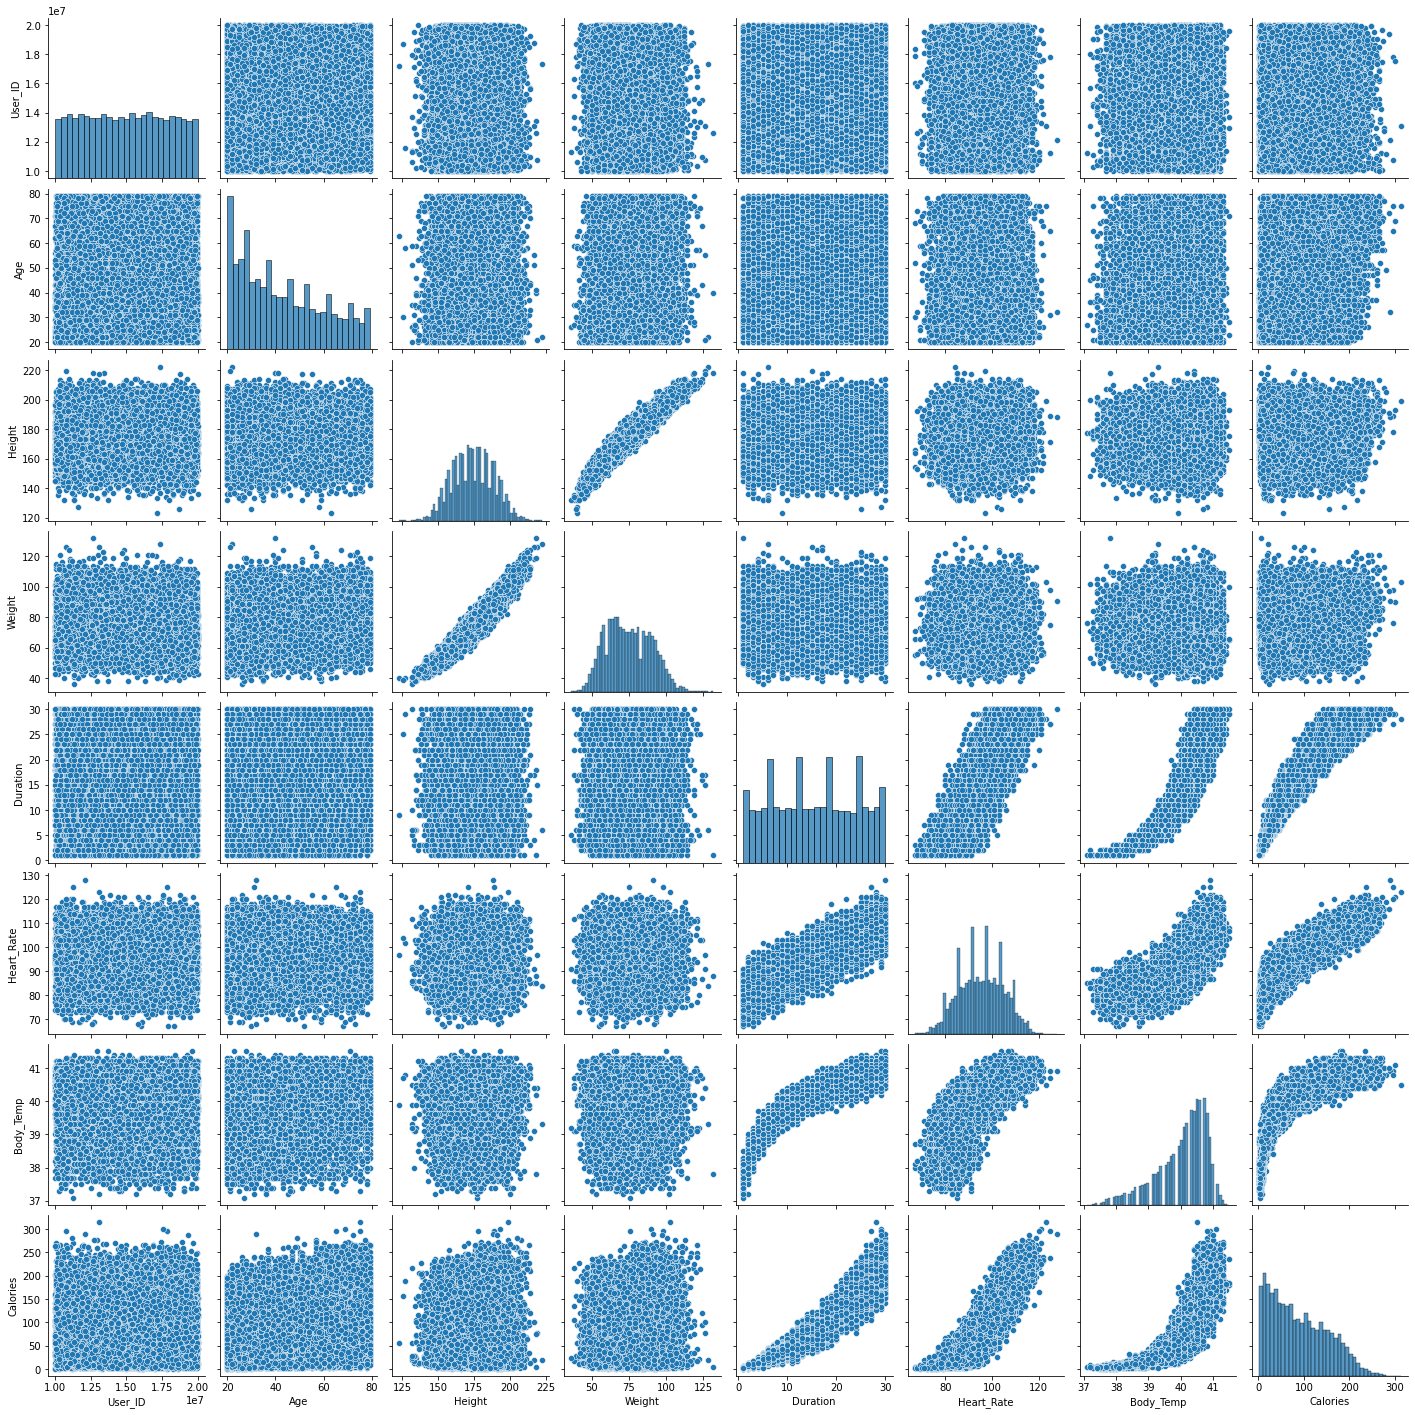

In [9]:
sns.pairplot(df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

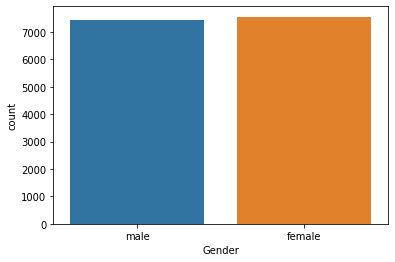

In [10]:
# plotting the gender column in count plot
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Calories', ylabel='Density'>

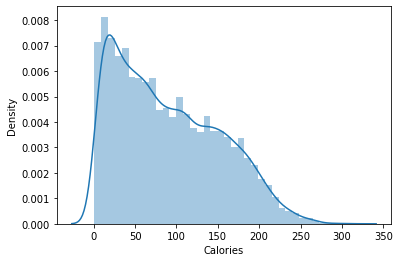

In [11]:
# ploting the distribution of "Age" column
sns.distplot(df['Calories'])

We have most no of values between 0 to 50, Means in 15000 data points we have more numbers of data point between 0 to 50.Maximum people burns there Calories is 0 to 50 calories in data set 

<AxesSubplot:xlabel='Age', ylabel='Density'>

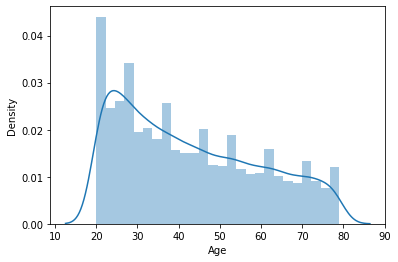

In [12]:
# finding the distribution of "Weight" column
sns.distplot(df["Age"])

In [13]:
print('Minimum age in dataset is : ' , df["Age"].min())
print('Maximum age in dataset is : ' , df["Age"].max())

Minimum age in dataset is :  20
Maximum age in dataset is :  79


In [14]:
age_groups = ["Young" , "Middle-Aged" , "Old"]
df["age_groups"] = pd.cut(df["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)
df["age_groups"].head()

0      Old
1    Young
2      Old
3    Young
4    Young
Name: age_groups, dtype: category
Categories (3, object): ['Young' < 'Middle-Aged' < 'Old']

In [15]:
df["age_groups"].value_counts()

Young          7502
Middle-Aged    4405
Old            3093
Name: age_groups, dtype: int64

<AxesSubplot:xlabel='age_groups', ylabel='count'>

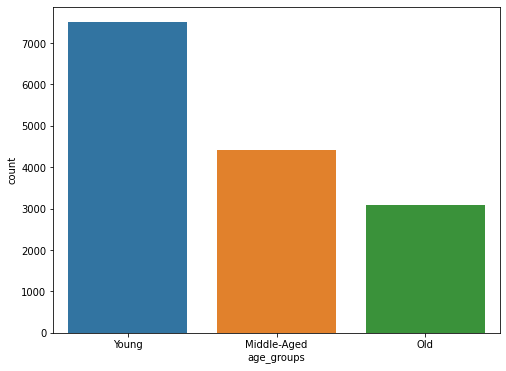

In [16]:
plt.figure(figsize=(8 , 6))
sns.countplot(data = df , x = "age_groups")

In [17]:
import plotly.express as px

fig = px.box(df , x= "age_groups" , y = "Calories" , color = "Gender")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()

#  Correlation in the dataset
 1.Positive Correlation
 2.Negative Correlation

<AxesSubplot:>

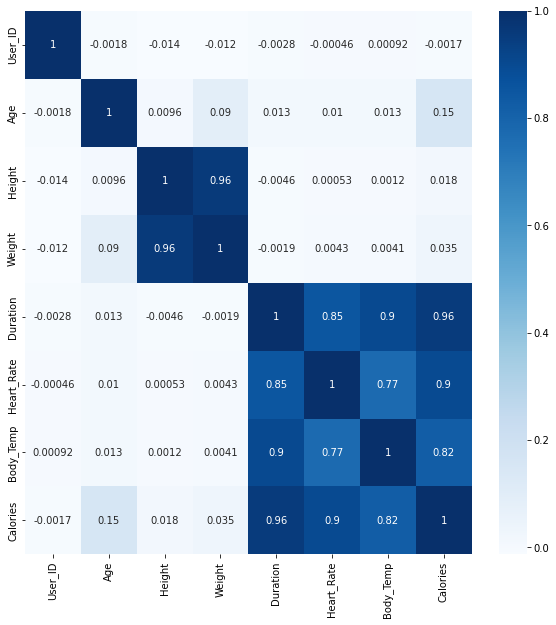

In [18]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

# Converting the text data to numerical values

In [19]:
df.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [20]:
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8   

   Calories age_groups  
0     231.0        Old  
1      66.0      Young  
2      26.0        Old  
3      71.0      Young  
4      35.0      Young

In [21]:
df.drop(["User_ID"], axis=1, inplace=True)

# Separating features and Target

In [22]:
x=df.iloc[:,: -2]
y=df.iloc[:, -2]

In [23]:
x

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]

In [24]:
y


0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

# Splitting the data into training data and Test data

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=1)

In [26]:
x.shape, xtrain.shape, xtest.shape

((15000, 7), (10500, 7), (4500, 7))

  # Importing Model 

In [27]:
linreg= LinearRegression()
svm= SVR()
rf= RandomForestRegressor()

In [28]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(f"MAE -: {mean_absolute_error(ytest, ypred)}")
    print(f"MSE -: {mean_squared_error(ytest, ypred)}")
    print(f"RMSE -: {np.sqrt(mean_squared_error(ytest, ypred))}")
    print(f"R-Squared -: {r2_score(ytest, ypred)}")

In [29]:
mymodel(linreg)

MAE -: 8.377255897559115
MSE -: 133.24870634235378
RMSE -: 11.543340345946392
R-Squared -: 0.9665828671024749


In [30]:
mymodel(svm)

MAE -: 11.426176553241016
MSE -: 280.4232721927078
RMSE -: 16.745843430317503
R-Squared -: 0.9296733003144814


In [31]:
mymodel(rf)

MAE -: 1.8677000000000004
MSE -: 9.592881133333334
RMSE -: 3.0972376617452744
R-Squared -: 0.9975942236701411


# Hyperparameter Tuning

In [32]:
# Hyperparameter Tuning of SVR
parameters = {"C":[1, 10], "gamma":[0.1, 0.01], "kernel":["rbf"]}

In [33]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(), parameters, verbose=2)
grid.fit(xtrain, ytrain)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   4.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   4.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   4.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   4.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   4.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   3.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   3.5s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   3.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   3.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   3.4s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   4.4s
[CV] END ........................C=10, gamma=0.1,

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'gamma': [0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [34]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [35]:
ypred = grid.predict(xtest)

In [36]:
print(f"R-Squared -: {r2_score(ytest, ypred)}")
print(f"RMSE -: {np.sqrt(mean_squared_error(ytest, ypred))}")

R-Squared -: 0.978870800308881
RMSE -: 9.178853357417328


Initially r2_score is  0.9296733003144814 and After Tuning SVM model I get 0.9787102662030116 score which is  far better score

After seeing above model we can say that RandomForestRegressor is the Best Fit Model